# Stochastic volatility processes: Geometric Brownian Motion (GBM) and Ornstein-Uhlenbeck (OU) processes

### Executive summary
#### GBM and OU are two stochastic volatility models used to predict the behavious of financial options. The main difference is that GBM does not take into account mean reversion, while OU does. The two models are presented and calibrated here on an example

# 1 Data import

In [1]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math

# 2 GBM model

Source:
https://towardsdatascience.com/simulating-stock-prices-in-python-using-geometric-brownian-motion-8dfd6e8c6b18

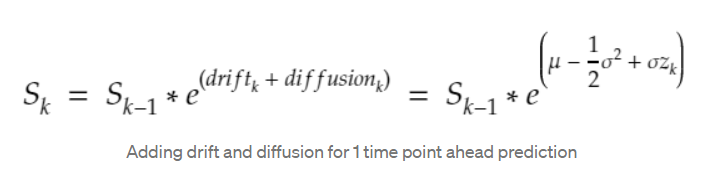

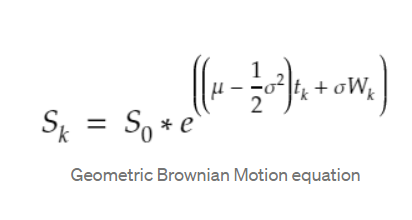

## 2.1 Variables definition

- So    :   initial stock price
- dt    :   time increment -> a day in our case
- T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
- N     :   number of time points in the prediction time horizon -> T/dt
- t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
- mu    :   mean of historical daily returns
- sigma :   standard deviation of historical daily returns
- b     :   array for brownian increments
- W     :   array for brownian path

The presented example follows step by step the procedure presented at the link

The first thing to do is to choose the interval of the history of prices that we want to use for the calibration

In [5]:
tr_begin = 1000
tr_end = 2000
tr_len = tr_end - tr_begin
interval_calibration = np.linspace(tr_begin, tr_end, tr_end -tr_begin + 1)

In [6]:
# Initial stock price
So = df.NIKE[2000] 

# Time step
dt = 1

# length of the prediction
T = 500 

# number of predictions
N = T/dt 
t = np.arange(1, int(N) + 1)

# Computation of the returns
returns = df.NIKE.pct_change()

# Mean and standard deviation of the returns
mu = np.mean(returns[interval_calibration])
sigma = np.std(returns[interval_calibration])

# Number of scenarios
scen_size = 10 
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

# Estimation of the drift and diffusion terms 
drift = mu -1/2*sigma**2 * t
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

In [9]:
b

{'1': array([-0.45633096,  0.3437311 ,  1.81193545, -0.70630685, -0.54527268,
        -0.60821999,  0.70084391, -0.65125004, -2.52097135, -0.60631112,
        -0.06744014,  0.99654246,  0.34765124, -1.32772146, -0.24600908,
         1.20080087, -0.36456845, -0.3906816 ,  0.17782403,  1.14925578,
         0.69536773, -0.50202767, -0.27178318, -0.78083558, -0.43202037,
        -0.59849661,  1.91699856,  0.93353789,  0.36470075, -0.23560673,
        -1.36937919, -0.45678647, -1.56558819,  0.16888899, -0.27606818,
         0.21243236,  0.42935772,  0.09719379, -0.94911656, -0.39613828,
         0.93146343,  0.64892323,  0.16991998,  0.51460103,  0.8588283 ,
         0.3430935 , -1.91512264,  0.6771068 ,  0.17210132,  2.08139087,
         0.90708546,  1.168488  ,  0.18596007,  0.39351196, -0.37098373,
         0.73157157, -0.53542412,  0.16112633,  0.47824877, -0.0655302 ,
        -3.30581166, -0.49541538, -1.01337393, -0.1486644 , -0.83434004,
        -3.06100839, -0.69971788,  0.19859945,

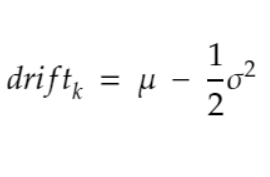

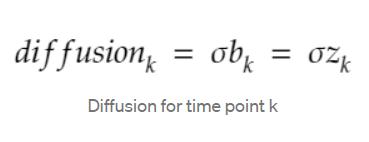

## 2.2 Computation of the predictions

In [22]:
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))

## 2.3 Plot of the scenarios

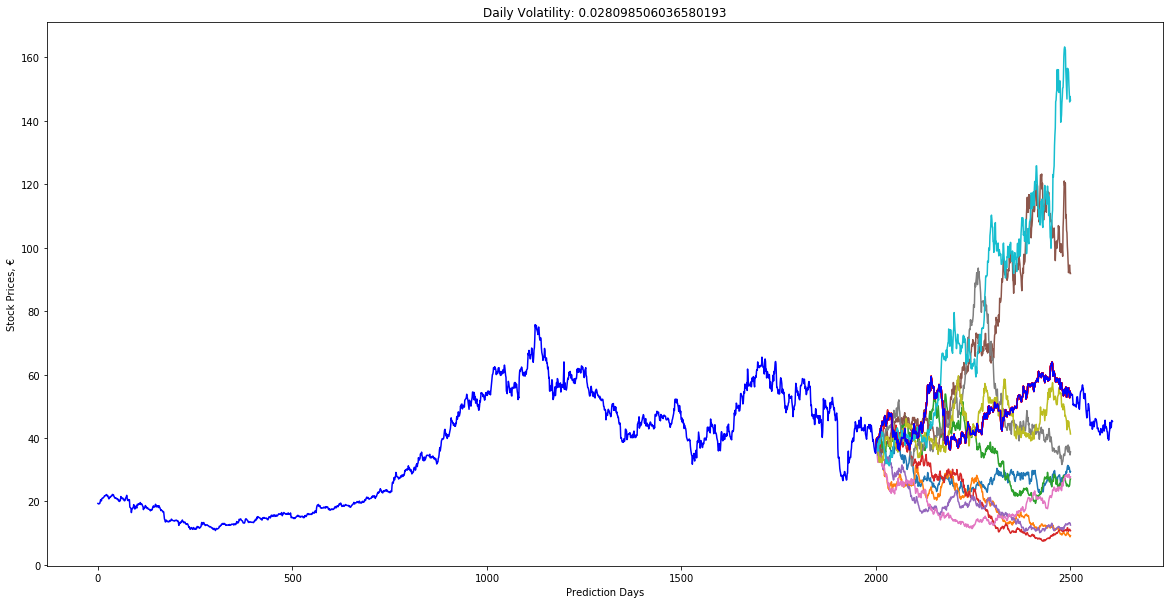

In [23]:
# Plotting the simulations
plt.figure(figsize = (20,10))
x = range(2000,2501)
x1 = range(0,2000)

for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(x,S[i, :])
    plt.plot(x,df.NIKE[2000:2501],'r')
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')

plt.plot(df.NIKE,'b')
plt.show()

# 3  Ornstein-Uhlenbeck process (Mean Reversion)

- calibration example: https://www.statisticshowto.com/wp-content/uploads/2016/01/Calibrating-the-Ornstein.pdf
- another calibration example: https://gtezio.medium.com/commodity-pricing-how-do-you-actually-do-it-fac34a0b7e08
- mean reversion using python: https://www.linkedin.com/pulse/algorithmic-trading-mean-reversion-using-python-bryan-chen/
- SdePy package: https://sdepy.readthedocs.io/en/v1.1.0/intro.html
- Solving stochastic differential equations (code taken from here): https://www.pik-potsdam.de/members/franke/lecture-sose-2016/introduction-to-python.pdf
- https://advancesindifferenceequations.springeropen.com/articles/10.1186/s13662-017-1234-y

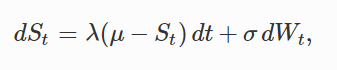

Where:
- mu is the long-run mean log price
- lambda is the rate of mean reversion
- sigma is the volatility of the process
- Wt is a Wiener process

The stochastic differential equation can be discretized as:
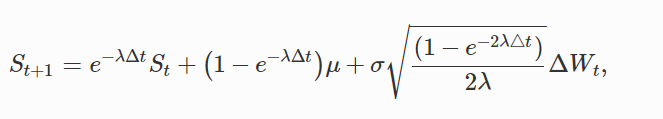


We can re-write this equation in parametric form in order to obtain a linear expression:
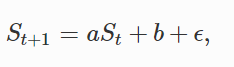

with the following relations between parameters:
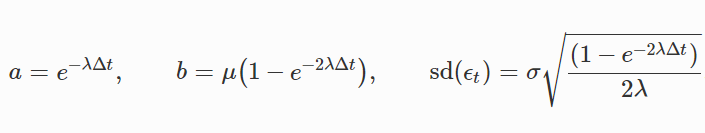  

If we re-arrange the equations we obtain:
    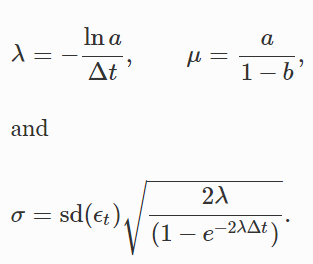

## 3.1 Setting up training and testing datasets

In [24]:
ts_start = 2000
ts_end = 2500
len_test = ts_end - ts_start
interval_test = np.linspace(ts_start, ts_end, ts_end - ts_start + 1)

train = df.NIKE[interval_calibration]
test = df.NIKE[interval_test]

## 3.2 Applying linear regression 

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True, normalize = False)

x1 = np.array([train]).T
x1 = x1[0:(len(x1)-1)]
y = np.array(df.NIKE[(tr_begin+1):(tr_end+1)]).T

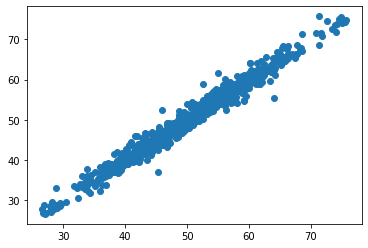

In [26]:
plt.scatter(x1,y)

In [27]:
model.fit(x1, y)
r_sq = model.score(x1, y)
a = model.coef_[0]
b = model.intercept_
print('a:', model.coef_[0])
print('b:', model.intercept_)

a: 0.9901970964340767
b: 0.47765651293662614


In [28]:
prediction = model.predict(x1)
residual = (y - prediction)
sd_eta = np.std(residual)

## 3.3 Reverse engineering of the parameters of the OU model

In [29]:
delta = 1
lambda_calc = -np.log(a)/delta
print('estimated lambda:', lambda_calc)

mu_calc = b/(1-a)
print('estimated mu: ', mu_calc)

sigma_calc = sd_eta*np.sqrt((-2*np.log(a))/(delta*(1-a**2)))
print('estimated sigma: ', sigma_calc)

estimated lambda: 0.009851268361601242
estimated mu:  48.72602384838805
estimated sigma:  1.3603497947558207


## 3.4 Simulations of the OU process

In [30]:
s_new = []
s_new.append(train[1999])
for i in range(1,500):
    s_new.append(s_new[i-1]*math.exp(-lambda_calc)
                 +mu_calc*(1-math.exp(-lambda_calc))
                 +sigma_calc*np.sqrt((1-math.exp(-2*lambda_calc))/(2*lambda_calc))*np.random.normal(0, 1, 1))
    

C:\Users\luigi\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


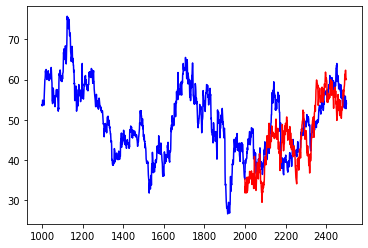

In [31]:
x_new = range(2000,2500)
plt.plot(train, 'b')
plt.plot(test,'b')
plt.plot(x_new,s_new,'r')

C:\Users\luigi\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\luigi\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\luigi\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays 

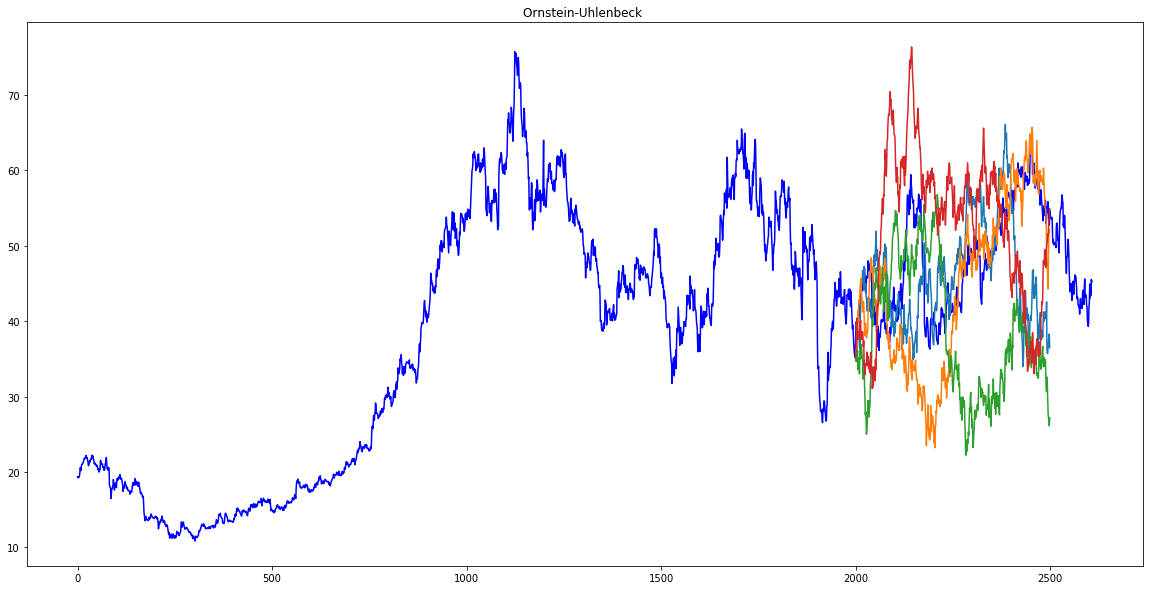

In [32]:
scenarios = range(1,5)
scenariosdata = []
plt.figure(figsize = (20,10))
plt.title("Ornstein-Uhlenbeck ")
plt.plot(df.NIKE, 'b')
plt.plot(test[0:500],'b')

for s in scenarios:
    s_new = []
    s_new.append(train[1999])
    for i in range(1,500):
        s_new.append(s_new[i-1]*math.exp(-lambda_calc)
                 +mu_calc*(1-math.exp(-lambda_calc))
                 +sigma_calc*np.sqrt((1-math.exp(-2*lambda_calc))/(2*lambda_calc))*np.random.normal(0, 1, 1))
    plt.plot(x_new,s_new)   
   


## 3.5 Simulation of the OU process using package Sdepy

link: https://sdepy.readthedocs.io/en/v1.1.2/generated/sdepy.ornstein_uhlenbeck_process.html

In [33]:
import sdepy

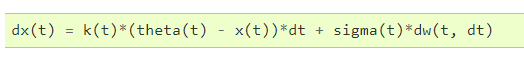

- k = lamda
- theta = mu
- sigma = sigma

We use the package **sdepy.ornstein_uhlenbeck_process**

In [42]:
process = sdepy.ornstein_uhlenbeck_process(paths=5, 
                                 vshape=(), 
                                 dtype=None, 
                                 steps=None, 
                                 i0=0, 
                                 info=None, 
                                 getinfo=True, 
                                 method='euler', 
                                 x0=train[1999], 
                                 theta=mu_calc, 
                                 k=lambda_calc, 
                                 sigma=sigma_calc, 
                                 dw=None, 
                                 corr=None, 
                                 rho=None)

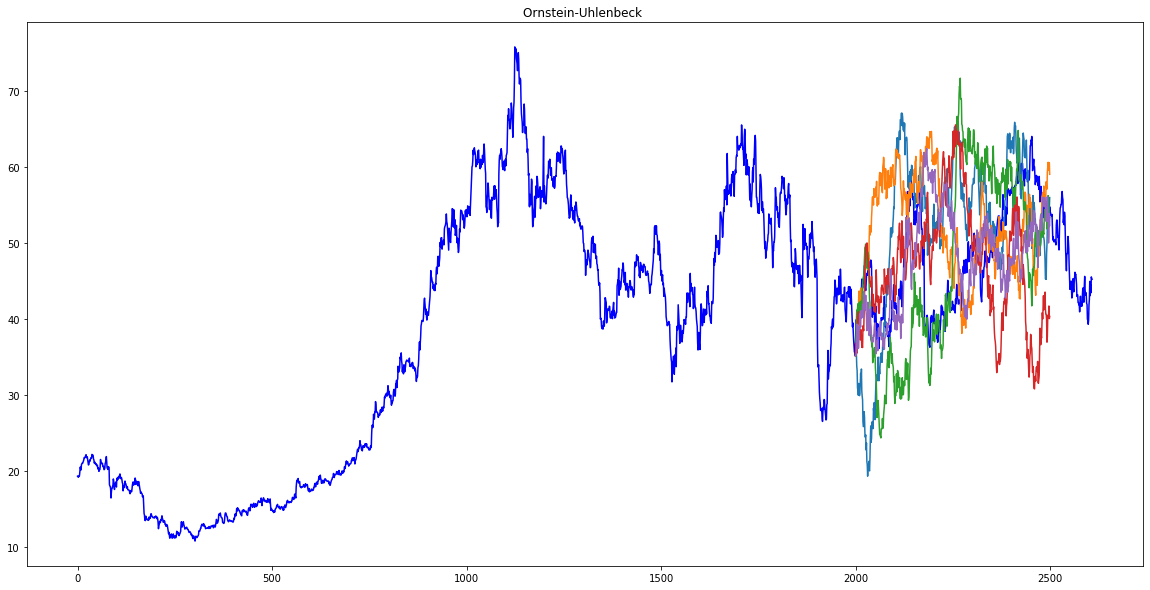

In [43]:
plt.figure(figsize = (20,10))
plt.title("Ornstein-Uhlenbeck ")
plt.plot(df.NIKE, 'b')
plt.plot(test[0:500],'b')
plt.plot(x_new,process(x_new))

In [6]:
pip install vanilla_option_pricing

  Using cached vanilla_option_pricing-0.1.0-py3-none-any.whl (8.7 kB)
Processing c:\users\luigi\appdata\local\pip\cache\wheels\2d\25\50\bc80b93c9a827ed9bef9d86f85365e1934bcbc0666b9f00c11\py_vollib-1.0.1-py3-none-any.whl
  Using cached simplejson-3.17.3-cp37-cp37m-win_amd64.whl (75 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
from vanilla_option_pricing.option import VanillaOption

In [8]:
from datetime import datetime, timedelta
from vanilla_option_pricing.option import VanillaOption
from vanilla_option_pricing.models import GeometricBrownianMotion

option = VanillaOption(
    spot=100,
    strike=101,
    dividend=0,
    date=datetime.today(),
    maturity=datetime.today() + timedelta(days=30),
    option_type='c',
    price=1,
    instrument='TTF'
)

In [15]:
option.spot

100

In [10]:
volatility = option.implied_volatility_of_undiscounted_price
model = GeometricBrownianMotion(volatility)
model_price = model.price_option_black(option)

In [16]:
model.price

AttributeError: 'GeometricBrownianMotion' object has no attribute 'price'

# Thesis part

# 1 Data import

In [2]:
df_big = pd.read_csv(r'C:\Users\LuigiGhiani\Downloads\tes_temp\OneDrive-2021-07-31\DF_big_processed.csv',parse_dates=['timestamp','datetime'])
df_minute = pd.read_csv(r'C:\Users\LuigiGhiani\Downloads\tes_temp\OneDrive-2021-07-31\df_minute_processed.csv',parse_dates=['timestamp','datetime'])
df_30s = pd.read_csv(r'C:\Users\LuigiGhiani\Downloads\tes_temp\OneDrive-2021-07-31\df_30s_processed.csv',parse_dates=['timestamp','datetime'])
df_15s = pd.read_csv(r'C:\Users\LuigiGhiani\Downloads\tes_temp\OneDrive-2021-07-31\df_15s_processed.csv',parse_dates=['timestamp','datetime'])

df_5min = pd.read_csv(r'C:\Users\LuigiGhiani\Downloads\tes_temp\OneDrive-2021-07-31\df_5min_processed.csv',parse_dates=['timestamp','datetime'])
df_10min = pd.read_csv(r'C:\Users\LuigiGhiani\Downloads\tes_temp\OneDrive-2021-07-31\df_10min_processed.csv',parse_dates=['timestamp','datetime'])
df_15min = pd.read_csv(r'C:\Users\LuigiGhiani\Downloads\tes_temp\OneDrive-2021-07-31\df_15min_processed.csv',parse_dates=['timestamp','datetime'])
df_30min = pd.read_csv(r'C:\Users\LuigiGhiani\Downloads\tes_temp\OneDrive-2021-07-31\df_30min_processed.csv',parse_dates=['timestamp','datetime'])


# 2 GBM

## 2.1 GBM 15s

In [4]:
df = df_15s
df = df.set_index('timestamp')
df['timestamp'] = df.index
df['numerical_index'] = np.array(range(0,len(df.price)))

In [26]:
returns = df.price.pct_change()

mask_So = (df.month == 6) & (df.day == 10) & (df.hour == 18)
So = float(df.price[mask_So][0])

# Time step in seconds
dt = 1

# length of the prediction in seconds 
T = 239

# number of predictions
N = T/dt 
t = np.arange(1, int(N) + 1)

mu = np.mean(returns[(df.day == 2) & (df.hour == 9)])
sigma = np.std(returns[(df.day == 2) & (df.hour == 9)])

# Number of scenarios
scen_size = 10 
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

# Estimation of the drift and diffusion terms 
drift = mu -1/2*sigma**2 * t
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

In [27]:
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))

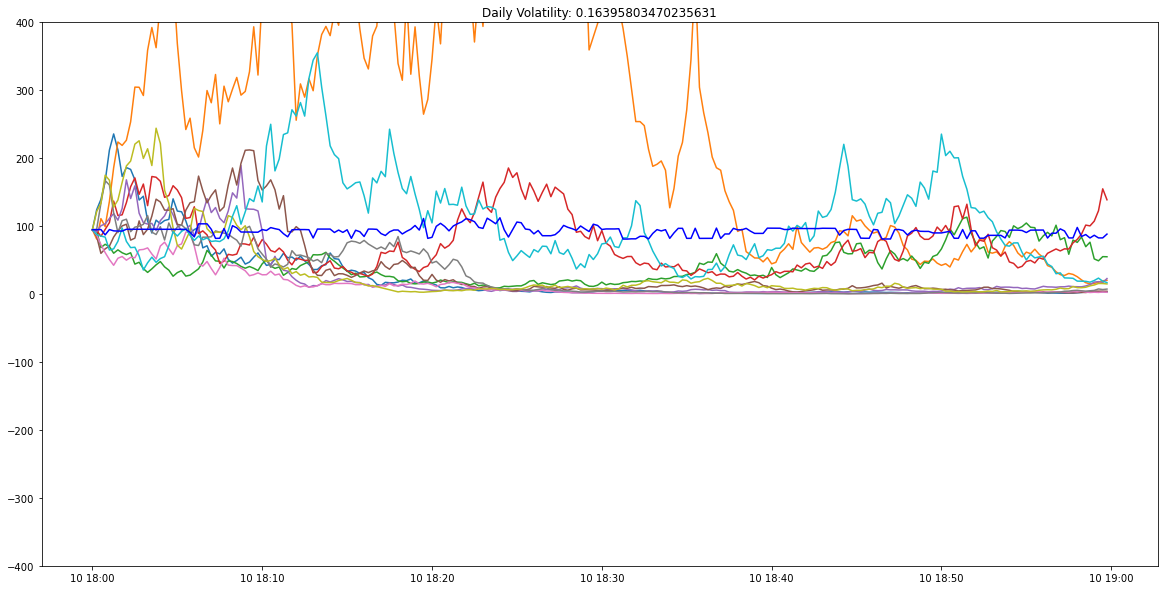

In [31]:
# Plotting the simulations
plt.figure(figsize = (20,10))

mask_test = (df.month == 6) & (df.day == 10) & (df.hour >= 18) & (df.hour < 19)
mask_train = (df.month == 6) & (df.day == 10) & (df.hour < 18)
x = (df.index[mask_test])
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(x,S[i, :])
    plt.ylim(-400,400)
    

plt.plot(df.price[mask_test],'b')

plt.show()

#plt.plot(list(range(0,500),f_new_minute[(df_new_minute.day == 2) & (df_new_minute.hour < 10)][0:500],'r'))

## 2.2 OU

In [52]:
import sdepy
from sklearn.linear_model import LinearRegression
number_processes = 100

In [174]:
RMSE_OU_h = []
MAPE_OU_h = []
MAE_OU_h = []

for h in range(0,24):
    ### CREATE A TESTING SET

    mask_test = (df.month == 6) & (df.day == 1) & (df.hour == h)

    df_test = pd.DataFrame(df[mask_test])
    len_test = len(df_test.price)

    start_test = df.numerical_index[mask_test][0]


    
    for i in range(1,100):

    ### CREATE A TRAINING SET
        
        RMSE_OU_tg = []
        MAPE_OU_tg = []
        MAE_OU_tg = []
        
        train_gap = 100*i

        mask_train = (df.numerical_index >= (start_test-train_gap)) & (df.numerical_index < start_test)
        df_train = df[mask_train]




        ### REGRESSING ON THE OU PARAMETERS

        model = LinearRegression(fit_intercept = True, normalize = False)
        x2 = np.array([[0]])
        x1 = np.array([df_train.price]).T
        x1 = x1[0:(len(x1)-1)]
        x1 = np.concatenate((x2, x1))
        y = np.array([df_train.price]).T

        x1 = x1[1:len(x1)]
        y = y[1:len(y)]
        #plt.scatter(x1,y)





        ### FITTING THE LINEAR REGRESSION MODEL TO EXTRACT THE COEFFICIENTS

        model.fit(x1, y)
        r_sq = model.score(x1, y)
        a = model.coef_[0]
        b = model.intercept_
        #print('a:', model.coef_[0])
        #print('b:', model.intercept_)





        ### REVERSE ENGINERING OF THE OU PARAMETERS FROM THE LINEAR REGRESSION COEFFICIENTS

        prediction = model.predict(x1)
        residual = (y - prediction)
        sd_eta = np.std(residual)

        delta = 1
        lambda_calc = -np.log(a)/delta
        #print('estimated lambda:', lambda_calc)

        mu_calc = b/(1-a)
        #print('estimated mu: ', mu_calc)

        sigma_calc = sd_eta*np.sqrt((-2*np.log(a))/(delta*(1-a**2)))
        #print('estimated sigma: ', sigma_calc)




        ### CREATION OF THE OU PROCESSES

        process = sdepy.ornstein_uhlenbeck_process(paths=number_processes, 
                                         vshape=(), 
                                         dtype=None, 
                                         steps=None, 
                                         i0=0, 
                                         info=None, 
                                         getinfo=True, 
                                         method='euler', 
                                         x0=x1[0], 
                                         theta=mu_calc, 
                                         k=lambda_calc, 
                                         sigma=sigma_calc, 
                                         dw=None, 
                                         corr=None, 
                                         rho=None)


        x_ou = list(range(0,len(df_test.price)))

        #plt.figure(figsize = (20,10))
        #plt.title("Ornstein-Uhlenbeck ")
        #plt.plot(df_train.price, 'b')
        #plt.plot(df_test.price,'b')
        #plt.plot(df_test.timestamp, process(x_ou))


        #plt.figure(figsize = (20,10))
        #plt.plot(df_test.price,'b')
        #plt.plot(df_test.timestamp, process(x_ou))

        #OU_dataframe = pd.DataFrame(process(x_ou))
        #plt.figure(figsize = (20,10))
        #plt.plot(df_test.price,'b')
        #plt.plot(df_test.timestamp, OU_dataframe.mean(axis=1))




        ### ESTIMATION OF THE ERROR PARAMETERS


        n = len(process(x_ou))
        label = np.array([df_test.price])
        
        RMSE_process = []
        MAPE_process = []
        MAE_process = []
        
        for i in range(0,number_processes):

            ou = process(x_ou)[:,i]
            
            RMSE_process.append(np.sqrt(1/n*np.sum((ou - label)**2)))
            MAPE_process.append((1/n*np.sum(np.abs(ou - label)/label)))
            MAE_process.append((1/n*np.sum(np.abs(ou - label))))
        
        RMSE_process = pd.DataFrame(RMSE_process)
        MAPE_process = pd.DataFrame(RMSE_process)
        MAE_process = pd.DataFrame(RMSE_process)
        
        RMSE_OU_tg.append(RMSE_process.mean(axis=1))
        MAPE_OU_tg.append(MAPE_process.mean(axis=1))
        MAE_OU_tg.append(MAE_process.mean(axis=1))
    
    RMSE_OU_h.append(RMSE_OU_tg)
    MAPE_OU_h.append(MAPE_OU_tg)
    MAE_OU_h.append(MAE_OU_tg)
    
    print('....completed for hour: ',h)

....completed for hour:  0
....completed for hour:  1
....completed for hour:  2
....completed for hour:  3
....completed for hour:  4
....completed for hour:  5
....completed for hour:  6
....completed for hour:  7
....completed for hour:  8
....completed for hour:  9
....completed for hour:  10
....completed for hour:  11
....completed for hour:  12
....completed for hour:  13
....completed for hour:  14
....completed for hour:  15
....completed for hour:  16
....completed for hour:  17
....completed for hour:  18
....completed for hour:  19
....completed for hour:  20
....completed for hour:  21
....completed for hour:  22
....completed for hour:  23
